In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import os
import warnings

In [2]:
insurance_df = pd.read_csv('insurance.csv')

In [3]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [7]:
skew=insurance_df['charges'].skew()
skew

1.5158796580240388

In [8]:
kurtosis=insurance_df['bmi'].kurtosis()
kurtosis

-0.05073153135467834

In [9]:
# Encode categorical variables
label_encoder = LabelEncoder()
insurance_df['sex'] = label_encoder.fit_transform(insurance_df['sex'])
insurance_df['smoker'] = label_encoder.fit_transform(insurance_df['smoker'])
insurance_df['region'] = label_encoder.fit_transform(insurance_df['region'])


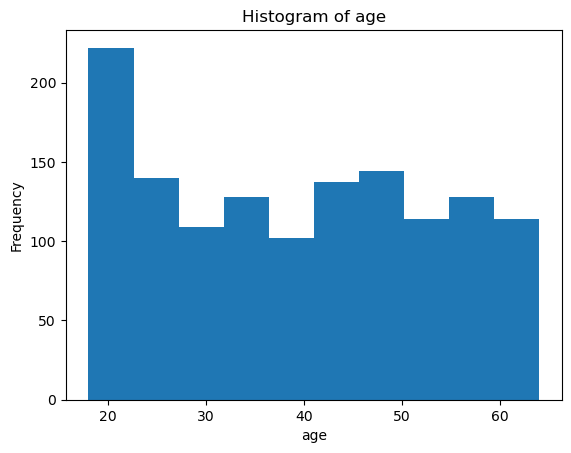

In [10]:
# Function to create a histogram
def create_histogram(data, column):
    plt.hist(data[column])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()
# Generate plots
create_histogram(insurance_df, 'age')

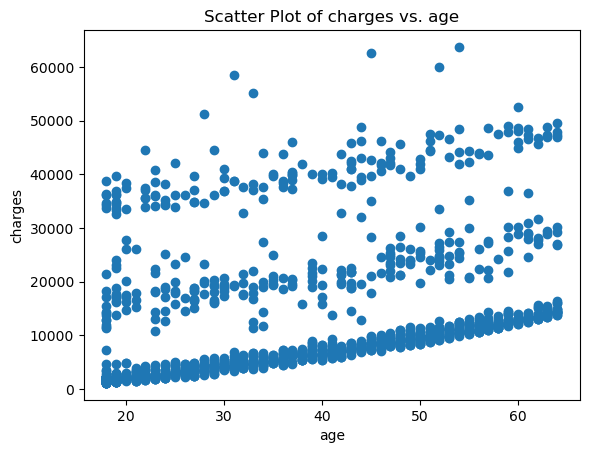

In [11]:
# Function to create a scatter plot
def create_scatter_plot(data, x_column, y_column):
    plt.scatter(data[x_column], data[y_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Scatter Plot of {y_column} vs. {x_column}')
    plt.show()
# Generate plots
create_scatter_plot(insurance_df, 'age', 'charges')

In [12]:
# Function to create a heatmap
def create_heatmap(data):
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Heatmap of Correlation Matrix')
    plt.show()
    
    


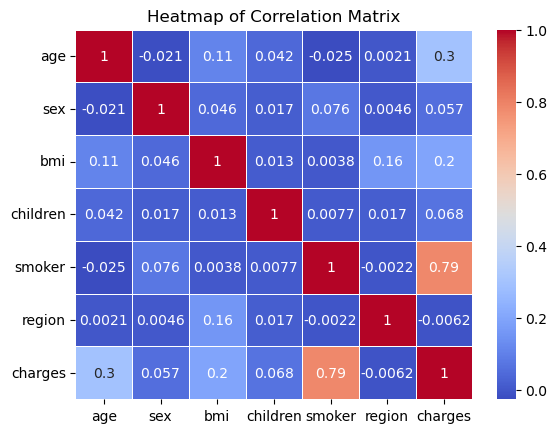

In [13]:
create_heatmap(insurance_df)

In [14]:
# Function to perform k-means clustering
def perform_clustering(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters,n_init=10)
    clusters = kmeans.fit_predict(data)
    return clusters


In [23]:
# Perform clustering
clusters = perform_clustering(insurance_df[['age', 'bmi', 'charges']], 3)
print("Cluster assignments:", clusters)


Cluster assignments: [0 1 1 ... 1 1 0]


In [16]:
# Function to fit a line to the data
def perform_fitting(data, x_column, y_column):
    X = data[[x_column]]
    y = data[y_column]
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0], model.intercept_


In [17]:
# Perform fitting
slope, intercept = perform_fitting(insurance_df, 'age', 'charges')
print("Line equation: y =", slope, "x +", intercept)

Line equation: y = 257.72261866689564 x + 3165.885006063021


In [18]:
# Function to plot the elbow method for determining the optimal number of clusters
def plot_elbow_method(data, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()
    # Suppress warnings related to KMeans
warnings.filterwarnings("ignore", category=UserWarning)


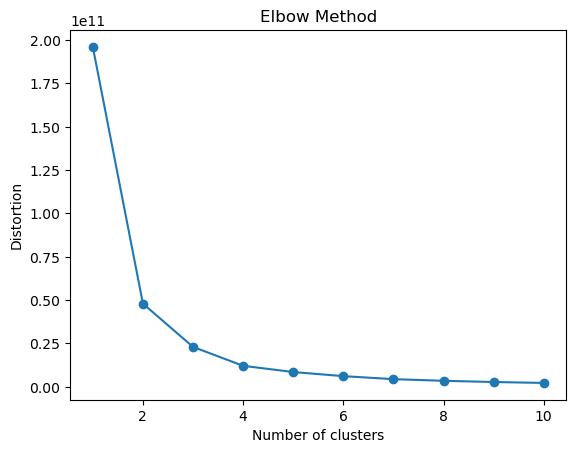

In [19]:
# Plot the elbow method
plot_elbow_method(insurance_df[['age', 'bmi', 'charges']])


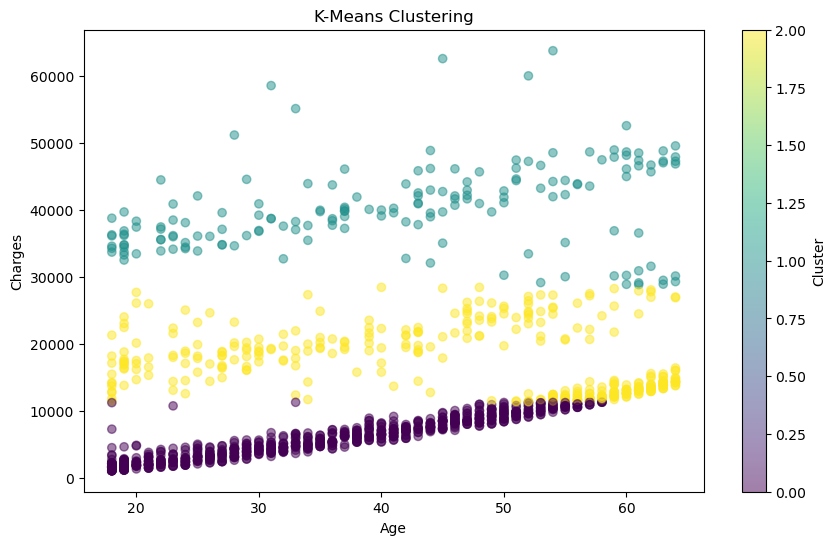

In [20]:
# Plotting clustering
plt.figure(figsize=(10, 6))
plt.scatter(insurance_df['age'], insurance_df['charges'], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()


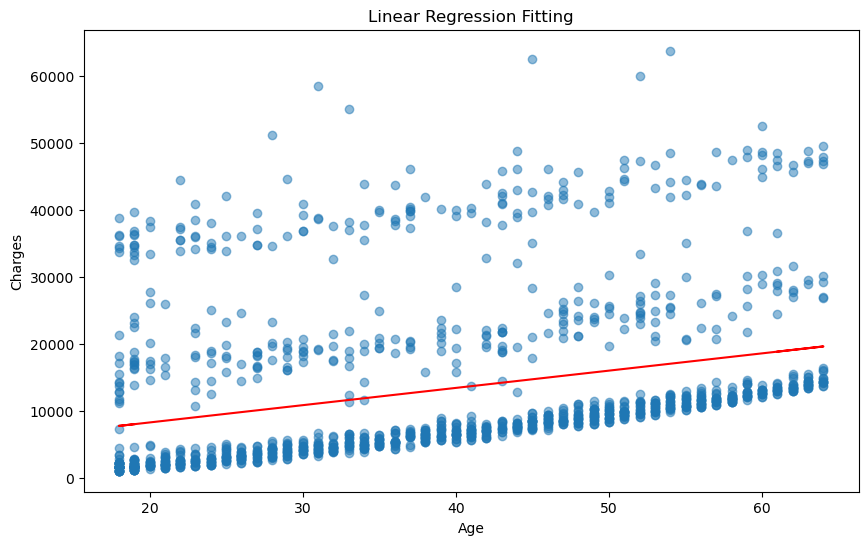

In [21]:
# Plotting line fitting
plt.figure(figsize=(10, 6))
plt.scatter(insurance_df['age'], insurance_df['charges'], alpha=0.5)
plt.plot(insurance_df['age'], slope * insurance_df['age'] + intercept, color='red')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression Fitting')
plt.show()
